##Library, Mount


In [1]:
!pip install DeepFace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 10.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=5db0d0db8a37d4bef6422819193602695f77d766d27a332141be28922f28c807
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


In [2]:
from google.colab import drive
import os
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from deepface import DeepFace
from tqdm import tqdm

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
fail_ = os.listdir("/content/drive/MyDrive/CV/Fail")
suc_ = os.listdir("/content/drive/MyDrive/CV/Suc")
print('성공 : {} 실패 : {}'.format(len(suc_),len(fail_)))

성공 : 910 실패 : 699


In [5]:
fail_land = os.listdir("/content/drive/MyDrive/Landmark/Fail")
suc_land = os.listdir("/content/drive/MyDrive/Landmark/Suc")
print('성공 : {} 실패 : {}'.format(len(suc_),len(fail_)))

성공 : 910 실패 : 699


##Git Clone

In [5]:
!git clone https://github.com/serengil/deepface.git
!git clone https://github.com/serengil/deepface_models.git

Cloning into 'deepface'...
remote: Enumerating objects: 3942, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 3942 (delta 5), reused 6 (delta 2), pack-reused 3928
Receiving objects: 100% (3942/3942), 49.62 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (2433/2433), done.
Cloning into 'deepface_models'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), 7.86 KiB | 1.31 MiB/s, done.


### 데이터 셋 만들기


In [109]:
target_size = (96,96)
temp_x_rgb = []
for i in tqdm(range(len(suc_))):
  path = "/content/drive/MyDrive/CV/Suc/" + suc_[i]
  img_rgb = load_img(path, color_mode='rgb', target_size=target_size)
  img_rgb = img_to_array(img_rgb)
  temp_x_rgb.append(img_rgb)

for j in tqdm(range(len(fail_))):
  path = "/content/drive/MyDrive/CV/Fail/" + fail_[j]
  img_rgb = load_img(path, color_mode='rgb', target_size=target_size)
  img_rgb = img_to_array(img_rgb)
  temp_x_rgb.append(img_rgb)


train_x = np.array(temp_x_rgb)


# y 라벨 가져오기 
y = [] 
for _ in tqdm(range(len(suc_))):
  y.append(1)
for _ in tqdm(range(len(fail_))):
  y.append(0)

train_x = np.array(temp_x_rgb)
y_ = [y]
train_y = np.array(y)

100%|██████████| 699/699 [00:00<00:00, 1895163.86it/s]


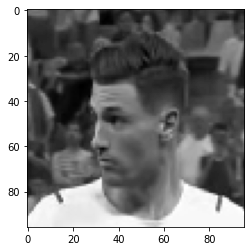

In [121]:
# cv2.imread('color image', temp_x[15] )
# # cv2.imread('gray image',temp_x_rgb[15] )
# target_size = (96,96)
# temp_x_rgb = []
# for i in tqdm(range(len(suc_))):
#   path = "/content/drive/MyDrive/CV/Suc/" + suc_[i]
#   img_rgb = load_img(path, color_mode='rgb', target_size=target_size)
#   img_rgb = img_to_array(img_rgb)
#   temp_x_rgb.append(img_rgb)

# for j in tqdm(range(len(fail_))):
#   path = "/content/drive/MyDrive/CV/Fail/" + fail_[j]
#   img_rgb = load_img(path, color_mode='rgb', target_size=target_size)
#   img_rgb = img_to_array(img_rgb)
#   temp_x_rgb.append(img_rgb)
import numpy as np

import matplotlib.cm as cm

from matplotlib import pyplot as plt
# plt.imshow(temp_x_rgb[15].astype('uint8'))
plt.imshow(temp_x[15].astype('uint8'),cmap = cm.gray)
# plt.show

In [108]:
target_size = (96,96)
temp_x = []
for i in tqdm(range(len(suc_))):
  path = "/content/drive/MyDrive/CV/Suc/" + suc_[i]
  img = load_img(path, color_mode='grayscale', target_size=target_size)
  img = img_to_array(img)
  temp_x.append(img)

for j in tqdm(range(len(fail_))):
  path = "/content/drive/MyDrive/CV/Fail/" + fail_[j]
  img = load_img(path, color_mode='grayscale', target_size=target_size)
  img = img_to_array(img)
  temp_x.append(img)


train_x = np.array(temp_x)


# # y 라벨 가져오기 
# y = [] 
# for _ in tqdm(range(len(suc_))):
#   y.append(1)
# for _ in tqdm(range(len(fail_))):
#   y.append(0)

# train_x = np.array(temp_x)
# y_ = [y]
# train_y = np.array(y)

100%|██████████| 699/699 [00:10<00:00, 64.56it/s]


In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(temp_x[1].astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(temp_x[].astype('uint8'))
plt.show

In [ ]:
# 랜드마크 적용 후 

target_size = (96,96)
land_temp_x = []
for i in range(len(suc_land)):
  land_path = "/content/drive/MyDrive/Landmark/Suc/" + suc_land[i]
  img_land = load_img(land_path, color_mode='rgb', target_size=target_size)
  img_land = img_to_array(img_land)
  land_temp_x.append(img_land)

for j in range(len(fail_land)):
  land_path = "/content/drive/MyDrive/Landmark/Fail/" + fail_land[j]
  img_land = load_img(land_path, color_mode='rgb', target_size=target_size)
  img_land = img_to_array(img_land)
  land_temp_x.append(img_land)


land_train_x = np.array(land_temp_x)


# y_land 라벨 가져오기 
y_land = [] 
for _ in range(len(suc_land)):
  y_land.append(1)
for _ in range(len(fail_land)):
  y_land.append(0)

land_train_x = np.array(land_temp_x)
land_train_y = np.array(y_land)

In [40]:
import random

In [48]:
target_size = (160,160)
temp_x_160 = []
for i in tqdm(range(len(suc_))):
  path = "/content/drive/MyDrive/CV/Suc/" + suc_[i]
  img = load_img(path, color_mode='rgb', target_size=target_size)
  img = img_to_array(img)
  temp_x_160.append(img)

for j in tqdm(range(len(fail_))):
  path = "/content/drive/MyDrive/CV/Fail/" + fail_[j]
  img = load_img(path, color_mode='rgb', target_size=target_size)
  img = img_to_array(img)
  temp_x_160.append(img)

np.random.seed(0)
temp_x_160 = random.sample(temp_x_160,len(temp_x_160))
train_x_160 = np.array(temp_x_160)


#y_160 라벨 가져오기 
y_160 = [] 
for _ in tqdm(range(len(suc_))):
  y_160.append(1)
for _ in tqdm(range(len(fail_))):
  y_160.append(0)


y_160 = random.sample(y_160,len(y_160))
train_y_160 = np.array(y_160)

100%|██████████| 699/699 [00:00<00:00, 2012229.58it/s]


In [ ]:
# zero-centering
compute_mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:
x_train -= mean_img
x_test -= mean_img
x_train.shape, x_test.shape

((1287, 96, 96, 3), (322, 96, 96, 3))

In [ ]:
# trainset으로 mean_img 계산하고, 
# testset은 trainset mean img로 
mean_img = compute_mean(train_x)
mean_img.shape

(96, 96, 3)

In [53]:
# 랜드마크 적용 전 
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2, shuffle=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1287, 96, 96, 3), (322, 96, 96, 3), (1287,), (322,))

In [54]:
#160
x_train_160, x_test_160, y_train_160, y_test_160 = train_test_split(train_x_160, train_y_160, test_size = 0.2, shuffle=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1287, 96, 96, 3), (322, 96, 96, 3), (1287,), (322,))

In [50]:
# 랜드마크 적용 후
x_train_land, x_test_land, y_train_land, y_test_land = train_test_split(land_train_x, land_train_y, test_size = 0.2, shuffle=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

NameError: ignored

In [ ]:
len(land_train_y)

1

In [ ]:
len(train_y)

1609

##모델 빌드

In [8]:
from tensorflow.keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras.models import save_model
from tensorflow.keras.callbacks import Callback

##모델 사용

In [ ]:
models = [
  "VGG-Face", #가능
  "Facenet",  #가능
  "Facenet512", #굳이? (softmax feature 512)   
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

#face verification
result = DeepFace.verify(img1_path = "/content/deepface/tests/dataset/img1.jpg", 
      img2_path = "/content/deepface/tests/dataset/img2.jpg", 
      model_name = models[0]
)

#face recognition
dfs = DeepFace.find(img_path = "/content/deepface/tests/dataset/img1.jpg",
      db_path = "/content/deepface/tests/dataset", 
      model_name = models[1]
)

#embeddings
embedding_objs = DeepFace.represent(img_path = "/content/deepface/tests/dataset/img1.jpg", 
      model_name = models[2]
)

There are  67  representations found in  representations_facenet.pkl
find function lasts  4.064791440963745  seconds


In [ ]:
print('reusult : ', result)
print(dfs)
print('embedding : ',embedding_objs)

reusult :  {'verified': True, 'distance': 0.2555190253609284, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 345, 'y': 211, 'w': 769, 'h': 769}, 'img2': {'x': 516, 'y': 192, 'w': 512, 'h': 512}}, 'time': 3.45}
[                                     identity  source_x  source_y  source_w  \
0    /content/deepface/tests/dataset/img1.jpg       345       211       769   
1   /content/deepface/tests/dataset/img11.jpg       345       211       769   
2    /content/deepface/tests/dataset/img7.jpg       345       211       769   
3   /content/deepface/tests/dataset/img10.jpg       345       211       769   
4  /content/deepface/tests/dataset/couple.jpg       345       211       769   
5    /content/deepface/tests/dataset/img6.jpg       345       211       769   
6    /content/deepface/tests/dataset/img2.jpg       345       211       769   
7    /content/deepface/tests/dataset/img4.jpg       345       211       7

In [ ]:
# 얼굴특징 
objs = DeepFace.analyze(img_path = '/content/deepface/tests/dataset/img1.jpg', 
        actions = ['age', 'gender', 'race', 'emotion']
)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 76.2MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:04<00:00, 116MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:07<00:00, 75.5MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:02<00:00, 190MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]


In [ ]:
objs

[{'age': 31,
  'region': {'x': 345, 'y': 211, 'w': 769, 'h': 769},
  'gender': {'Woman': 99.99407529830933, 'Man': 0.0059287704061716795},
  'dominant_gender': 'Woman',
  'race': {'asian': 9.939989447593689,
   'indian': 13.22726458311081,
   'black': 3.637080639600754,
   'white': 23.464034497737885,
   'middle eastern': 20.388396084308624,
   'latino hispanic': 29.343241453170776},
  'dominant_race': 'latino hispanic',
  'emotion': {'angry': 6.4261656946585755e-21,
   'disgust': 0.0,
   'fear': 1.1585355746969857e-26,
   'happy': 100.0,
   'sad': 5.2277158138740135e-17,
   'surprise': 4.701538464102484e-09,
   'neutral': 4.4179806479860417e-07},
  'dominant_emotion': 'happy'}]

In [ ]:
start = '/content/deepface/tests/dataset/'
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]

#face verification
obj = DeepFace.verify(img1_path = start+"img1.jpg", 
        img2_path = start + "img2.jpg", 
        detector_backend = backends[0]
)

#face recognition
dfs = DeepFace.find(img_path ="img.jpg", 
        db_path = "/content/deepface/tests/dataset", 
        detector_backend = backends[1]
)

#embeddings
embedding_objs = DeepFace.represent(img_path = start+"img1.jpg", 
        detector_backend = backends[2]
)

#facial analysis
demographies = DeepFace.analyze(img_path = start+"/img4.jpg", 
        detector_backend = backends[3]
)

#face detection and alignment
face_objs = DeepFace.extract_faces(img_path = start+"img1.jpg", 
        target_size = (224, 224), 
        detector_backend = backends[4]
)

In [ ]:
import warnings
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from deepface import DeepFace

# pylint: disable=consider-iterating-dictionary

print("-----------------------------------------")

warnings.filterwarnings("ignore")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

tf_major_version = int(tf.__version__.split(".", maxsplit=1)[0])

if tf_major_version == 2:
    import logging

    tf.get_logger().setLevel(logging.ERROR)

print("Running unit tests for TF ", tf.__version__)

print("-----------------------------------------")

expected_coverage = 97
num_cases = 0
succeed_cases = 0


def evaluate(condition):

    global num_cases, succeed_cases

    if condition == True:
        succeed_cases += 1

    num_cases += 1


# ------------------------------------------------

detectors = ["opencv", "mtcnn"]
models = ["VGG-Face", "Facenet", "ArcFace"]
metrics = ["cosine", "euclidean", "euclidean_l2"]

dataset = [
    ["dataset/img1.jpg", "dataset/img2.jpg", True],
    ["dataset/img5.jpg", "dataset/img6.jpg", True],
    ["dataset/img6.jpg", "dataset/img7.jpg", True],
    ["dataset/img8.jpg", "dataset/img9.jpg", True],
    ["dataset/img1.jpg", "dataset/img11.jpg", True],
    ["dataset/img2.jpg", "dataset/img11.jpg", True],
    ["dataset/img1.jpg", "dataset/img3.jpg", False],
    ["dataset/img2.jpg", "dataset/img3.jpg", False],
    ["dataset/img6.jpg", "dataset/img8.jpg", False],
    ["dataset/img6.jpg", "dataset/img9.jpg", False],
]

print("-----------------------------------------")


def test_cases():

    print("Enforce detection test")
    black_img = np.zeros([224, 224, 3])

    # enforce detection on for represent
    try:
        DeepFace.represent(img_path=black_img)
        exception_thrown = False
    except:
        exception_thrown = True

    assert exception_thrown is True

    # -------------------------------------------

    # enforce detection off for represent
    try:
        objs = DeepFace.represent(img_path=black_img, enforce_detection=False)
        exception_thrown = False

        # validate response of represent function
        assert isinstance(objs, list)
        assert len(objs) > 0
        assert isinstance(objs[0], dict)
        assert "embedding" in objs[0].keys()
        assert "facial_area" in objs[0].keys()
        assert isinstance(objs[0]["facial_area"], dict)
        assert "x" in objs[0]["facial_area"].keys()
        assert "y" in objs[0]["facial_area"].keys()
        assert "w" in objs[0]["facial_area"].keys()
        assert "h" in objs[0]["facial_area"].keys()
        assert isinstance(objs[0]["embedding"], list)
        assert len(objs[0]["embedding"]) == 2622  # embedding of VGG-Face
    except Exception as err:
        print(f"Unexpected exception thrown: {str(err)}")
        exception_thrown = True

    assert exception_thrown is False

    # -------------------------------------------
    # enforce detection on for verify
    try:
        obj = DeepFace.verify(img1_path=black_img, img2_path=black_img)
        exception_thrown = False
    except:
        exception_thrown = True

    assert exception_thrown is True
    # -------------------------------------------
    # enforce detection off for verify

    try:
        obj = DeepFace.verify(img1_path=black_img, img2_path=black_img, enforce_detection=False)
        assert isinstance(obj, dict)
        exception_thrown = False
    except Exception as err:
        print(f"Unexpected exception thrown: {str(err)}")
        exception_thrown = True

    assert exception_thrown is False
    # -------------------------------------------

    print("-----------------------------------------")

    print("Extract faces test")

    for detector in detectors:
        img_objs = DeepFace.extract_faces(img_path="dataset/img11.jpg", detector_backend=detector)
        for img_obj in img_objs:
            assert "face" in img_obj.keys()
            assert "facial_area" in img_obj.keys()
            assert isinstance(img_obj["facial_area"], dict)
            assert "x" in img_obj["facial_area"].keys()
            assert "y" in img_obj["facial_area"].keys()
            assert "w" in img_obj["facial_area"].keys()
            assert "h" in img_obj["facial_area"].keys()
            assert "confidence" in img_obj.keys()

            img = img_obj["face"]
            evaluate(img.shape[0] > 0 and img.shape[1] > 0)
            print(detector, " test is done")

    print("-----------------------------------------")

    img_path = "dataset/img1.jpg"
    embedding_objs = DeepFace.represent(img_path)
    for embedding_obj in embedding_objs:
        embedding = embedding_obj["embedding"]
        print("Function returned ", len(embedding), "dimensional vector")
        evaluate(len(embedding) == 2622)

    print("-----------------------------------------")

    print("Different face detectors on verification test")

    for detector in detectors:
        print(detector + " detector")
        res = DeepFace.verify(dataset[0][0], dataset[0][1], detector_backend=detector)

        assert isinstance(res, dict)
        assert "verified" in res.keys()
        assert res["verified"] in [True, False]
        assert "distance" in res.keys()
        assert "threshold" in res.keys()
        assert "model" in res.keys()
        assert "detector_backend" in res.keys()
        assert "similarity_metric" in res.keys()
        assert "facial_areas" in res.keys()
        assert "img1" in res["facial_areas"].keys()
        assert "img2" in res["facial_areas"].keys()
        assert "x" in res["facial_areas"]["img1"].keys()
        assert "y" in res["facial_areas"]["img1"].keys()
        assert "w" in res["facial_areas"]["img1"].keys()
        assert "h" in res["facial_areas"]["img1"].keys()
        assert "x" in res["facial_areas"]["img2"].keys()
        assert "y" in res["facial_areas"]["img2"].keys()
        assert "w" in res["facial_areas"]["img2"].keys()
        assert "h" in res["facial_areas"]["img2"].keys()

        print(res)
        evaluate(res["verified"] == dataset[0][2])

    print("-----------------------------------------")

    print("Find function test")

    dfs = DeepFace.find(img_path="dataset/img1.jpg", db_path="dataset")
    for df in dfs:
        assert isinstance(df, pd.DataFrame)
        print(df.head())
        evaluate(df.shape[0] > 0)

    print("-----------------------------------------")

    print("Facial analysis test. Passing nothing as an action")

    img = "dataset/img4.jpg"
    demography_objs = DeepFace.analyze(img)
    for demography in demography_objs:
        print(demography)
        evaluate(demography["age"] > 20 and demography["age"] < 40)
        evaluate(demography["dominant_gender"] == "Woman")

    print("-----------------------------------------")

    print("Facial analysis test. Passing all to the action")
    demography_objs = DeepFace.analyze(img, ["age", "gender", "race", "emotion"])

    for demography in demography_objs:
        # print(f"Demography: {demography}")
        # check response is a valid json
        print("Age: ", demography["age"])
        print("Gender: ", demography["dominant_gender"])
        print("Race: ", demography["dominant_race"])
        print("Emotion: ", demography["dominant_emotion"])

        evaluate(demography.get("age") is not None)
        evaluate(demography.get("dominant_gender") is not None)
        evaluate(demography.get("dominant_race") is not None)
        evaluate(demography.get("dominant_emotion") is not None)

    print("-----------------------------------------")

    print("Facial analysis test 2. Remove some actions and check they are not computed")
    demography_objs = DeepFace.analyze(img, ["age", "gender"])

    for demography in demography_objs:
        print("Age: ", demography.get("age"))
        print("Gender: ", demography.get("dominant_gender"))
        print("Race: ", demography.get("dominant_race"))
        print("Emotion: ", demography.get("dominant_emotion"))

        evaluate(demography.get("age") is not None)
        evaluate(demography.get("dominant_gender") is not None)
        evaluate(demography.get("dominant_race") is None)
        evaluate(demography.get("dominant_emotion") is None)

    print("-----------------------------------------")

    print("Facial recognition tests")

    for model in models:
        for metric in metrics:
            for instance in dataset:
                img1 = instance[0]
                img2 = instance[1]
                result = instance[2]

                resp_obj = DeepFace.verify(img1, img2, model_name=model, distance_metric=metric)

                prediction = resp_obj["verified"]
                distance = round(resp_obj["distance"], 2)
                threshold = resp_obj["threshold"]

                passed = prediction == result

                evaluate(passed)

                if passed:
                    test_result_label = "passed"
                else:
                    test_result_label = "failed"

                if prediction == True:
                    classified_label = "verified"
                else:
                    classified_label = "unverified"

                print(
                    img1.split("/", maxsplit=1)[-1],
                    "-",
                    img2.split("/", maxsplit=1)[-1],
                    classified_label,
                    "as same person based on",
                    model,
                    "and",
                    metric,
                    ". Distance:",
                    distance,
                    ", Threshold:",
                    threshold,
                    "(",
                    test_result_label,
                    ")",
                )

            print("--------------------------")

    # -----------------------------------------

    print("Passing numpy array to analyze function")

    img = cv2.imread("dataset/img1.jpg")
    resp_objs = DeepFace.analyze(img)

    for resp_obj in resp_objs:
        print(resp_obj)
        evaluate(resp_obj["age"] > 20 and resp_obj["age"] < 40)
        evaluate(resp_obj["gender"] == "Woman")

    print("--------------------------")

    print("Passing numpy array to verify function")

    img1 = cv2.imread("dataset/img1.jpg")
    img2 = cv2.imread("dataset/img2.jpg")

    res = DeepFace.verify(img1, img2)
    print(res)
    evaluate(res["verified"] == True)

    print("--------------------------")

    print("Passing numpy array to find function")

    img1 = cv2.imread("dataset/img1.jpg")

    dfs = DeepFace.find(img1, db_path="dataset")

    for df in dfs:
        print(df.head())
        evaluate(df.shape[0] > 0)

    print("--------------------------")

    print("non-binary gender tests")

    # interface validation - no need to call evaluate here

    for img1_path, _, _ in dataset:
        for detector in detectors:
            results = DeepFace.analyze(
                img1_path, actions=("gender",), detector_backend=detector, enforce_detection=False
            )

            for result in results:
                print(result)

                assert "gender" in result.keys()
                assert "dominant_gender" in result.keys() and result["dominant_gender"] in [
                    "Man",
                    "Woman",
                ]

                if result["dominant_gender"] == "Man":
                    assert result["gender"]["Man"] > result["gender"]["Woman"]
                else:
                    assert result["gender"]["Man"] < result["gender"]["Woman"]


# ---------------------------------------------

test_cases()

print("num of test cases run: " + str(num_cases))
print("succeeded test cases: " + str(succeed_cases))

test_score = (100 * succeed_cases) / num_cases

print("test coverage: " + str(test_score))

if test_score > expected_coverage:
    print("well done! min required test coverage is satisfied")
else:
    print("min required test coverage is NOT satisfied")

assert test_score > expected_coverage

## VGG

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

In [72]:
#224
target_size = (224,224)
temp_x_224 = []
for i in tqdm(range(len(suc_))):
  path = "/content/drive/MyDrive/CV/Suc/" + suc_[i]
  img = load_img(path, color_mode='rgb', target_size=target_size)
  img = img_to_array(img)
  temp_x_224.append(img)

for j in tqdm(range(len(fail_))):
  path = "/content/drive/MyDrive/CV/Fail/" + fail_[j]
  img = load_img(path, color_mode='rgb', target_size=target_size)
  img = img_to_array(img)
  temp_x_224.append(img)

np.random.seed(0)
temp_x_224 = random.sample(temp_x_224,len(temp_x_224))
train_x_224 = np.array(temp_x_224)


#y_224 라벨 가져오기 
y_224 = [] 
for _ in tqdm(range(len(suc_))):
  y_224.append(1)
for _ in tqdm(range(len(fail_))):
  y_224.append(0)


y_224 = random.sample(y_224,len(y_224))
train_y_224 = np.array(y_224)

100%|██████████| 699/699 [00:00<00:00, 1863838.84it/s]


In [73]:
#데이터 split 나중에 추가 확인. 
x_train_224, x_test_224, y_train_224, y_test_224 = train_test_split(train_x_224, train_y_224, test_size = 0.2)
x_train_224.shape, x_test_224.shape, y_train_224.shape, y_test_224.shape

((1287, 224, 224, 3), (322, 224, 224, 3), (1287,), (322,))

In [74]:
#VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=( 224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [75]:
#vgg_model weight 가져오기
model.load_weights('/content/drive/MyDrive/model_weigth/vgg_face_weights.h5')

In [76]:
#새롭게 pre_train 모델을 전이 학습하기 위해 학습시키고 싶은 layer를 지정한다. 

for layer in model.layers[:-7]:
    layer.trainable = False


# 새로운 own model을 빌드한다. 현재 -4 이후의 결과 == Fully connect layer 만 을 새롭게 빌드. 
base_model_output = Sequential()
base_model_output = Convolution2D(2, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)
 
soccer_model_vgg = Model(inputs=model.input, outputs=base_model_output) # 새로운 soccer_model 만들기. 

In [78]:
# 모델 컴파일 현재 성공 실패를 원핫 인코딩안하고 있으니까 sparse categorical로 진행. 
soccer_model_vgg.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
soccer_model_vgg.fit(x_train_224, y_train_224, epochs=30, validation_split=0.1, callbacks=[early])


Epoch 1/30
37/37 [==============================] - 7s 142ms/step - loss: 10.0308 - accuracy: 0.4991 - val_loss: 5.6293 - val_accuracy: 0.4884
Epoch 2/30
37/37 [==============================] - 4s 116ms/step - loss: 2.7988 - accuracy: 0.5060 - val_loss: 0.9448 - val_accuracy: 0.4341
Epoch 3/30
37/37 [==============================] - 4s 116ms/step - loss: 1.5163 - accuracy: 0.5449 - val_loss: 0.7563 - val_accuracy: 0.4651
Epoch 4/30
37/37 [==============================] - 4s 117ms/step - loss: 1.1118 - accuracy: 0.5078 - val_loss: 0.7463 - val_accuracy: 0.4884
Epoch 5/30
37/37 [==============================] - 4s 116ms/step - loss: 0.8908 - accuracy: 0.5527 - val_loss: 0.8959 - val_accuracy: 0.5039
Epoch 6/30
37/37 [==============================] - 4s 116ms/step - loss: 1.0355 - accuracy: 0.5475 - val_loss: 1.2897 - val_accuracy: 0.5116
Epoch 7/30
37/37 [==============================] - 4s 117ms/step - loss: 0.9517 - accuracy: 0.5518 - val_loss: 0.6972 - val_accuracy: 0.4884
Epoch

##OpenFace


In [11]:
%run /content/deepface/deepface/basemodels/OpenFace.py

In [12]:
model = loadModel()

openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5
100%|██████████| 15.3M/15.3M [00:01<00:00, 8.14MB/s]


In [27]:
#새롭게 pre_train 모델을 전이 학습하기 위해 학습시키고 싶은 layer를 지정한다. 

for layer in model.layers[:-24]:
    layer.trainable = False


# 새로운 own model을 빌드한다. 현재 -4 이후의 결과 == Fully connect layer 만 을 새롭게 빌드. 
base_model_output = Sequential()
base_model_output = Convolution2D(2, (2, 2), name='predictions')(model.layers[-5].output)
base_model_output = Convolution2D(2, (2, 2), name='predictions1')(base_model_output)

base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)
 
soccer_model_openface = Model(inputs=model.input, outputs=base_model_output)

In [ ]:
soccer_model_openface.summary()

In [28]:
# 모델 컴파일 현재 성공 실패를 원핫 인코딩안하고 있으니까 sparse categorical로 진행. 
soccer_model_openface.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
tf.config.experimental_run_functions_eagerly(True)

In [17]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [29]:
soccer_model_openface.fit(x_train, y_train, epochs= 100, validation_split=0.1,callbacks=early)

Epoch 1/100
37/37 [==============================] - 7s 182ms/step - loss: 0.7131 - accuracy: 0.5604 - val_loss: 0.6827 - val_accuracy: 0.5659
Epoch 2/100
37/37 [==============================] - 7s 182ms/step - loss: 0.6824 - accuracy: 0.5820 - val_loss: 0.7115 - val_accuracy: 0.4729
Epoch 3/100
37/37 [==============================] - 7s 180ms/step - loss: 0.6927 - accuracy: 0.5699 - val_loss: 0.6753 - val_accuracy: 0.6047
Epoch 4/100
37/37 [==============================] - 7s 181ms/step - loss: 0.7411 - accuracy: 0.5674 - val_loss: 0.6884 - val_accuracy: 0.5581
Epoch 5/100
37/37 [==============================] - 7s 180ms/step - loss: 0.6857 - accuracy: 0.5751 - val_loss: 0.6587 - val_accuracy: 0.5969
Epoch 6/100
37/37 [==============================] - 7s 181ms/step - loss: 0.6637 - accuracy: 0.5846 - val_loss: 0.7412 - val_accuracy: 0.4961
Epoch 7/100
37/37 [==============================] - 7s 181ms/step - loss: 0.6556 - accuracy: 0.6010 - val_loss: 0.7457 - val_accuracy: 0.4961

In [30]:
soccer_model_openface.evaluate(x_test, y_test)

11/11 [==============================] - 1s 93ms/step - loss: 0.8118 - accuracy: 0.4503


[0.8117539286613464, 0.4503105580806732]

In [ ]:
y_pred = soccer_model_openface.predict(x_test)

11/11 [==============================] - 1s 97ms/step


In [ ]:
temp_x[0].shape

(96, 96, 3)

In [31]:
#모델 저장 원하는 방식대로 
save_model(soccer_model_openface, "/content/drive/MyDrive/model_openface")

In [22]:
soccer_model_openface.save('model_openface.h5')

In [25]:
from keras.models import load_model

## 예시 

In [ ]:
temp = x_test[2].reshape(1,96,96,3)

In [ ]:
y_test[6], y_pred[6]

(1, array([0.7176641, 0.2823359], dtype=float32))

In [ ]:
temp = img1.reshape(1,96,96,3)

In [ ]:
soccer_model_openface.predict(temp)

1/1 [==============================] - 0s 411ms/step


array([[0.12018222, 0.87981784]], dtype=float32)

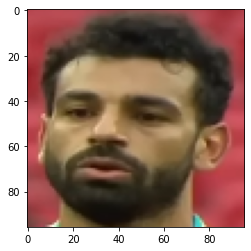

In [ ]:
plt.imshow(x_test[6].astype("uint8"))

In [ ]:
from sklearn.metrics import classification_report

y_pred = soccer_model_openface.predict(x_test) #모델만 변경

y_preds = []
for i in y_pred:
    y_preds.append(np.argmax(i))

name = ['0', '1']

print(classification_report(y_test, y_preds, target_names=name))

11/11 [==============================] - 1s 106ms/step
              precision    recall  f1-score   support

           0       0.59      0.64      0.62       150
           1       0.66      0.62      0.64       172

    accuracy                           0.63       322
   macro avg       0.63      0.63      0.63       322
weighted avg       0.63      0.63      0.63       322



##ensemble

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

In [33]:
inceptionResnet_model = tf.keras.models.load_model('/content/drive/MyDrive/model_resnet')

In [34]:
pred_ensemble = np.mean([soccer_model_openface,inceptionResnet_model ], axis=0)
pred_ensemble

TypeError: ignored

In [45]:
pred_openface = soccer_model_openface(x_test)

In [ ]:
pred_openface pred_facenet pred_vgg

In [55]:
pred_facenet = inceptionResnet_model(x_test_160)

In [81]:
pred_vgg = soccer_model_vgg(x_test_224)

In [82]:
pred_ensemble = np.mean([pred_openface, pred_facenet,pred_vgg], axis=0)
pred_ensemble

array([[0.45081183, 0.5491882 ],
       [0.47365987, 0.52634007],
       [0.2549762 , 0.7450238 ],
       [0.41831568, 0.58168435],
       [0.23198257, 0.7680175 ],
       [0.5286092 , 0.47139072],
       [0.5393948 , 0.46060523],
       [0.09785565, 0.90214443],
       [0.25973532, 0.7402647 ],
       [0.2486528 , 0.75134724],
       [0.31672922, 0.68327075],
       [0.17689873, 0.8231013 ],
       [0.5929758 , 0.40702415],
       [0.23323317, 0.76676685],
       [0.34224424, 0.65775573],
       [0.6296581 , 0.37034193],
       [0.47185096, 0.52814907],
       [0.24268965, 0.75731033],
       [0.28208563, 0.7179144 ],
       [0.34403133, 0.65596867],
       [0.22441821, 0.7755818 ],
       [0.51532656, 0.4846734 ],
       [0.5252701 , 0.47472993],
       [0.33171552, 0.6682845 ],
       [0.3043199 , 0.69568014],
       [0.510839  , 0.489161  ],
       [0.5382273 , 0.4617727 ],
       [0.58208936, 0.41791067],
       [0.21032818, 0.78967184],
       [0.27046248, 0.7295375 ],
       [0.

In [97]:
pred_ensemble = np.argmax(pred_ensemble)
pred_ensemble

0

In [70]:
import numpy as np
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(pred_ensemble, y_test_160)

0.5590062111801242

In [64]:
accuracy_score(np.argmax(pred_v1, axis=1), y_test)

In [66]:
y_test.shape

()

In [68]:
y_test.shape

()

In [60]:
y_test_160.shape

(322,)

In [86]:
def mode(list):
    count = 0
    mode = 0;
    for x in list: 
        if list.count(x) > count:
            count = list.count(x)
            mode = x

    return mode
    

In [94]:
pred = [pred_openface ,pred_facenet, pred_vgg]

In [ ]:
list(pred_openface)

In [104]:
y_predict = []
for i in range(0, len(pred_openface)):
    y_predict.append(mode([np.argmax(pred_openface[i]), np.argmax(pred_facenet[i]), np.argmax(pred_vgg[i])]))

print(y_predict) #[1. 1. 0. 0.]
print(accuracy_score(y_test_160, y_predict))

[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]
0.5372670807453416


In [90]:
pred_ensemble=list(pred_ensemble)